## Recursos Necessários

Para este *notebook*, deve ser utilizado o `Python 3.5` ou superior com as seguintes bibliotecas externas, alguns exemplos que deverão ser instaladas:

* [`matplotlib`](https://matplotlib.org/): Construção e exibição de gráficos variados
* [`seaborn`](https://seaborn.pydata.org/): Construção e exibição de gráficos variados
* [`pandas`](https://pandas.pydata.org/pandas-docs/stable/index.html): Manipulação de dados em formato de tabelas
* [`numpy`](https://numpy.org): Manipulação de dados em formato de vetores e matrizes


Primeiro, deve-se importar todas as bibliotecas que serão usadas ao longo deste notebook.

In [1]:
from pca import pca
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install pca

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Aplicação do PCA
O PCA é uma técnica usada para reduzir a dimensionalidade de conjuntos de dados de alta dimensionalidade.

Os passos básicos para aplicar o PCA são:

* Padronizar os dados para garantir que todas as variáveis tenham a mesma escala.
* Calcular a matriz de covariância ou correlação dos dados.
* Calcular os autovetores e autovalores da matriz de covariância ou correlação.
* Selecionar os componentes principais com base nos autovalores.
* Projetar os dados nos componentes principais selecionados.

O resultado é uma representação de menor dimensionalidade dos dados originais, onde as dimensões são os componentes principais selecionados. 

In [4]:
# Importa o arquivo e guarda em um dataframe do Pandas
df_pca = pd.read_excel('df_categorico.xlsx', index_col = 0)

O código abaixo realiza a ***normalização dos dados***, transformando-os para uma escala entre 0 e 1. Isso é útil para garantir que todas as variáveis tenham a mesma faixa de valores antes de aplicar o PCA.

In [5]:
X = df_pca.iloc[:,:].values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [6]:
pca1 = PCA()
pca1.fit(X)

PCA()

In [7]:
PCA()

PCA()

In [8]:
pca1.explained_variance_

array([8.30429063e-01, 7.84483179e-01, 5.18377130e-01, 4.27326006e-01,
       4.13959404e-01, 3.88746348e-01, 3.63419895e-01, 3.39095262e-01,
       3.29808548e-01, 3.19357373e-01, 3.03092309e-01, 2.90232453e-01,
       2.75978545e-01, 2.67236936e-01, 2.61652993e-01, 2.49750709e-01,
       2.42522440e-01, 2.28541782e-01, 2.21602808e-01, 2.17223910e-01,
       2.05787355e-01, 2.01153044e-01, 1.99623921e-01, 1.98027164e-01,
       1.87080699e-01, 1.83983090e-01, 1.70881727e-01, 1.67652842e-01,
       1.59873723e-01, 1.56791816e-01, 1.53123084e-01, 1.44866053e-01,
       1.40768491e-01, 1.37951500e-01, 1.36246573e-01, 1.31167099e-01,
       1.30677791e-01, 1.28172081e-01, 1.24387491e-01, 1.23282588e-01,
       1.16782037e-01, 1.10578198e-01, 1.05495318e-01, 1.03411235e-01,
       1.00077518e-01, 9.46934752e-02, 8.77909862e-02, 8.49059534e-02,
       8.23464580e-02, 8.05076917e-02, 7.77220807e-02, 7.64663995e-02,
       7.32398267e-02, 7.18508373e-02, 6.75723759e-02, 6.48643113e-02,
      

# Gráfico de Scree

O gráfico abaixo exibirá a variação explicada pelos componentes principais selecionados. Plotando a variância explicada pelos componentes principais usando os autovalores do objeto PCA (pca1.explained_variance_). 

C:\Users\Ronaldo\AppData\Local\Temp\ipykernel_5464\3527499616.py:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



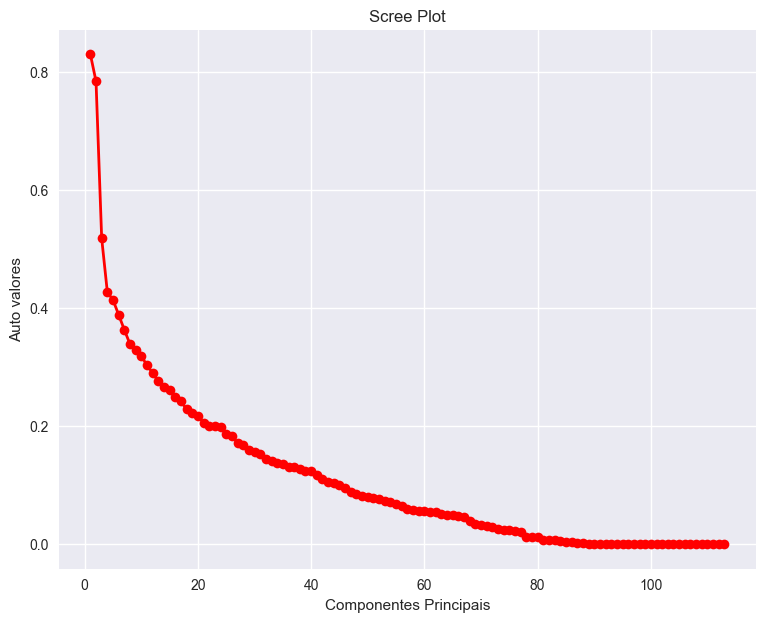

In [9]:
plt.style.use('seaborn') # estilo de plotagem "seaborn"
plt.figure(figsize=(9,7)) # tamanho da figura como 9x7
plt.plot(range(1, pca1.n_components_ + 1), pca1.explained_variance_, 'ro-', linewidth = 2)
plt.title('Scree Plot')
plt.xlabel('Componentes Principais')
plt.ylabel('Auto valores')
plt.show()

In [10]:
print(pca1.explained_variance_ratio_.cumsum())

[0.06488273 0.12617563 0.16667725 0.2000649  0.2324082  0.26278156
 0.29117613 0.31767017 0.34343863 0.36839052 0.3920716  0.41474792
 0.43631056 0.4571902  0.47763356 0.49714697 0.51609563 0.53395196
 0.55126613 0.56823818 0.58431667 0.60003307 0.61563    0.63110217
 0.64571908 0.66009397 0.67344523 0.68654421 0.69903539 0.71128578
 0.72324953 0.73456814 0.7455666  0.75634497 0.76699013 0.77723842
 0.78744848 0.79746277 0.80718136 0.81681362 0.82593798 0.83457763
 0.84282015 0.85089983 0.85871904 0.86611759 0.87297684 0.87961068
 0.88604453 0.89233473 0.89840727 0.90438171 0.91010406 0.91571788
 0.92099741 0.92606536 0.93078618 0.93537665 0.93983543 0.94425337
 0.94857692 0.9527934  0.95678723 0.96070089 0.96454511 0.96830628
 0.97185804 0.97495087 0.97767702 0.98019914 0.98257633 0.98486465
 0.98682014 0.98873019 0.9905633  0.992275   0.99387532 0.99485744
 0.99582377 0.99675814 0.99734821 0.99790847 0.99845627 0.99892395
 0.99924189 0.99946999 0.99969461 0.99984302 0.99992805 0.9999

**Redução da dimensionalidade** de tal forma que o PCA selecione o número mínimo de componentes principais necessários para explicar pelo menos 80% da variância total dos dados. 

In [11]:
model = pca(n_components=0.80)

In [12]:
scores_pca = model.fit_transform(X, verbose=0)

In [17]:
scores_pca['PC'].head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39
0,1.245292,-0.175921,0.531733,-0.520663,-0.107671,-0.745400,-0.207665,-0.473115,0.683213,0.334975,...,0.450597,0.461784,0.332575,-0.650296,-0.117818,0.093831,-0.038031,0.063346,-0.145054,-0.229098
1,1.002872,-0.062957,0.010801,-0.985141,-0.723680,1.043376,0.299846,0.215169,0.266413,0.877935,...,0.652075,0.282545,0.370795,-0.104657,-0.293403,-0.426552,-1.110090,0.050159,-0.157514,-0.301919
2,-1.506590,1.143591,-0.165192,-0.684362,-1.049930,0.370427,-0.569559,0.138130,1.103403,-0.131314,...,-0.107340,0.238412,-0.018143,0.429791,0.378691,-0.372472,-0.145410,-0.123820,0.072769,-0.182955
3,0.865969,-0.362922,0.228870,1.010735,-1.084903,0.737313,-0.778146,-0.378786,-0.661478,0.548134,...,0.695615,0.725621,-0.097320,-0.234402,-0.012764,0.636815,-0.419389,0.165917,0.495530,-0.375941
4,-1.069311,-0.135315,-0.214523,0.279184,0.055769,1.178672,-0.785549,0.235979,0.710571,0.178235,...,-0.066125,0.169865,-0.295218,0.539715,0.054092,0.155813,-0.224051,0.080069,0.265156,-0.078646


In [18]:
scores_pca['loadings'].iloc[0:14,0:33]

,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,33
PC1,-0.010039,0.004668,-0.003729,-0.262673,0.039627,1.886140e-19,-0.054366,-0.089015,-0.065943,0.021652,...,-0.007274,-0.000242,0.007499,0.193516,0.025682,-0.201172,-0.025525,0.001255,-0.043572,-0.016707
PC2,0.025646,-0.251006,-0.305789,0.130739,0.270066,-5.232855e-19,0.010704,0.025612,0.015039,-0.000887,...,0.011094,0.000329,-0.005837,-0.039589,-0.023333,0.057804,0.010953,-0.006476,-0.067592,0.026166
PC3,-0.036530,0.051933,0.054185,-0.066957,0.017443,-2.433438e-19,-0.110390,-0.110239,-0.044224,0.073195,...,0.014825,0.000987,-0.003866,-0.146709,-0.047037,0.180918,0.016694,-0.007989,-0.200353,0.110728
PC4,0.006433,-0.044044,-0.043374,-0.070597,-0.016445,-4.373841e-18,0.039153,0.006207,-0.036367,-0.049832,...,0.021929,0.001035,0.007673,0.183226,-0.347223,0.136260,0.020064,0.029354,0.239543,-0.495345
PC5,-0.002333,0.057326,0.071968,-0.103302,0.003143,9.890767e-18,0.011604,-0.062451,-0.065191,-0.026749,...,-0.011821,-0.000534,-0.002708,-0.073728,0.213864,-0.124878,-0.012550,0.001252,0.396324,-0.192241
PC6,-0.001888,-0.444385,-0.450603,-0.034463,0.029059,-2.886596e-17,-0.002539,-0.063366,-0.065017,0.043013,...,-0.001818,-0.000484,-0.006008,-0.202212,0.265752,-0.049621,-0.007911,-0.000323,0.287686,-0.198284
PC7,0.007103,0.187141,0.174537,0.199929,0.004315,-9.697171e-18,-0.012995,0.068675,0.142033,0.113651,...,0.011736,0.000530,-0.007474,-0.301351,0.442009,-0.133436,0.000252,0.000178,0.098338,-0.268626
PC8,-0.003484,0.147602,0.161248,-0.157130,0.079877,7.252191e-18,-0.011027,-0.074047,-0.125803,0.012555,...,-0.003499,0.000198,-0.001248,-0.098340,0.073103,0.027190,-0.000706,-0.005577,0.169072,-0.140831
PC9,0.005508,-0.053729,-0.052010,0.169090,0.073510,1.112748e-17,-0.015035,0.010321,0.089787,0.102184,...,-0.003261,0.000447,-0.001921,0.216923,-0.422375,0.204424,0.002949,-0.010347,0.236038,0.005582
PC10,-0.002987,-0.239535,-0.240845,-0.025978,-0.042342,4.099227e-17,-0.014716,-0.008585,0.038199,0.052235,...,0.000841,-0.000279,0.004824,0.023419,0.050998,-0.076026,-0.003215,0.005917,-0.252313,0.113161


In [20]:
scores_pca['PC'].head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39
0,1.245292,-0.175921,0.531733,-0.520663,-0.107671,-0.745400,-0.207665,-0.473115,0.683213,0.334975,...,0.450597,0.461784,0.332575,-0.650296,-0.117818,0.093831,-0.038031,0.063346,-0.145054,-0.229098
1,1.002872,-0.062957,0.010801,-0.985141,-0.723680,1.043376,0.299846,0.215169,0.266413,0.877935,...,0.652075,0.282545,0.370795,-0.104657,-0.293403,-0.426552,-1.110090,0.050159,-0.157514,-0.301919
2,-1.506590,1.143591,-0.165192,-0.684362,-1.049930,0.370427,-0.569559,0.138130,1.103403,-0.131314,...,-0.107340,0.238412,-0.018143,0.429791,0.378691,-0.372472,-0.145410,-0.123820,0.072769,-0.182955
3,0.865969,-0.362922,0.228870,1.010735,-1.084903,0.737313,-0.778146,-0.378786,-0.661478,0.548134,...,0.695615,0.725621,-0.097320,-0.234402,-0.012764,0.636815,-0.419389,0.165917,0.495530,-0.375941
4,-1.069311,-0.135315,-0.214523,0.279184,0.055769,1.178672,-0.785549,0.235979,0.710571,0.178235,...,-0.066125,0.169865,-0.295218,0.539715,0.054092,0.155813,-0.224051,0.080069,0.265156,-0.078646


# Features
Features mais importantes e obtenção da taxa de variabilidade explicada e seus respectivos coeficientes para cada componente. 
As features são listadas em ordem decrescente de importância, ou seja, aquelas com os maiores coeficientes têm maior influência na explicabilidade daquela componente.


In [19]:
print(scores_pca['topfeat'])

       PC feature   loading  type
0     PC1      46 -0.409780  best
1     PC2       3 -0.305789  best
2     PC3      46  0.325634  best
3     PC4      22 -0.552171  best
4     PC5      19 -0.422503  best
..    ...     ...       ...   ...
119  PC14     108  0.312596  weak
120  PC39     109  0.113774  weak
121  PC25     110  0.033709  weak
122  PC28     111 -0.035878  weak
123  PC23     113 -0.210840  weak

[124 rows x 4 columns]


In [27]:
# Varaiação explicada cumulativa
scores_pca['explained_var']

array([0.06488273, 0.12617563, 0.16667725, 0.20006489, 0.23240818,
       0.26278153, 0.2911761 , 0.3176701 , 0.34343837, 0.36839024,
       0.39207119, 0.41474746, 0.43630971, 0.45718884, 0.47763118,
       0.49714445, 0.51609225, 0.53394844, 0.55126078, 0.56823176,
       0.58430879, 0.6000214 , 0.61560976, 0.63107973, 0.64569344,
       0.66006345, 0.67340874, 0.68650201, 0.6989847 , 0.7112155 ,
       0.72315955, 0.73446036, 0.74543376, 0.75617802, 0.76677147,
       0.77701077, 0.78713865, 0.79713811, 0.80678989])

##### *Porcentagem de explicação de cada componente*

Será obtido um array explained_variance que contém a taxa de variabilidade explicada por cada componente principal. Cada valor representa a contribuição percentual de um componente para a variância total dos dados.

Essa informação é útil para identificar quais componentes principais explicam a maior parte da variância nos dados. 

In [28]:
size = len(scores_pca['explained_var'])
explained_variance = np.zeros(size)

# Percorreremos do n-ésimo valor em 'explained_var' até o penúltimo realizando uma diferença entre o valor atual e o posterior.
for i in range(size - 1, 0, -1):
  explained_variance[i] = (scores_pca['explained_var'][i] - scores_pca['explained_var'][i - 1]) * 100

explained_variance[0] = scores_pca['explained_var'][0] * 100
print(explained_variance)

[6.48827261 6.12929021 4.05016178 3.33876458 3.23432931 3.03733487
 2.83945619 2.64940005 2.57682721 2.49518721 2.36809486 2.26762737
 2.15622515 2.0879124  2.04423459 1.95132694 1.89477922 1.7856192
 1.73123448 1.69709814 1.60770311 1.57126085 1.55883568 1.54699718
 1.4613711  1.43700051 1.33452965 1.3093269  1.24826849 1.22308052
 1.19440423 1.13008185 1.09733912 1.07442608 1.05934576 1.0239294
 1.01278839 0.99994554 0.96517788]


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 39 Principal Components explain [80.67%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

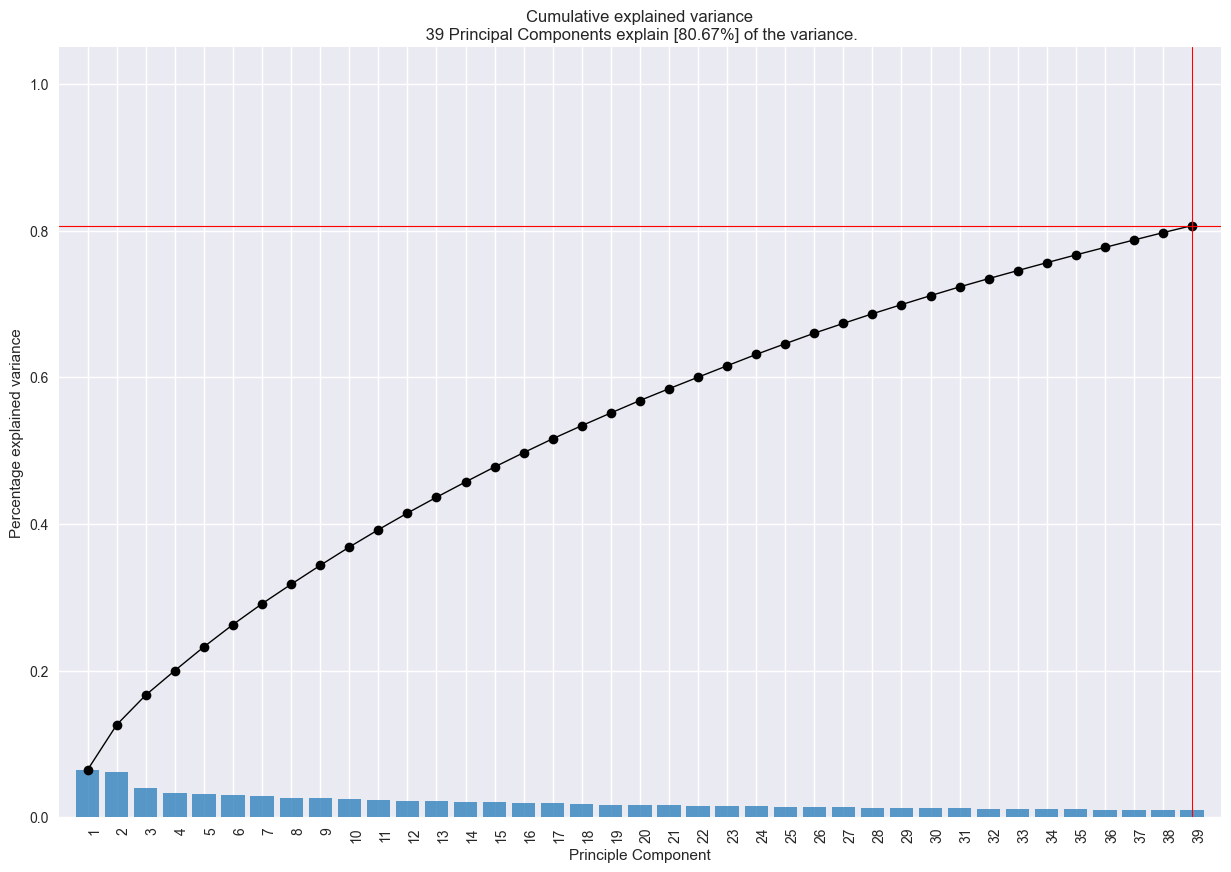

In [29]:
model.plot()

## Clusterização de Dados

A clusterização é uma técnica de aprendizado não supervisionado usada para agrupar dados em diferentes grupos, com base em sua similaridade.

Ao aplicar a clusterização, o algoritmo identifica padrões e estruturas nos dados, agrupando pontos de dados semelhantes e separando pontos de dados diferentes.


In [30]:
#Pacotes e bibliotecas necessárias
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

## Método do Cotovelo para Clusterização

O método do cotovelo é uma técnica comumente usada para determinar o número ideal de clusters em algoritmos de clusterização.
Indentificando o ponto de inflexão (cotovelo) no gráfico da soma das distâncias quadráticas intra-cluster em relação ao número de clusters. Esse ponto sugere o número de clusters onde a adição de mais clusters não fornece uma melhora significativa na variação explicada.

In [31]:
# Soma das distâncias quadradas intra cluster
wcss = []
for i in range (1, 26):
  kmeans_pca = KMeans(n_clusters = i, random_state=39)
  kmeans_pca.fit(scores_pca['PC'])
  wcss.append(kmeans_pca.inertia_)
  print(f"Número de Clusters: {i}, WCSS: {kmeans_pca.inertia_}")

c:\Users\Ronaldo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Número de Clusters: 1, WCSS: 195496.1452790294


c:\Users\Ronaldo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Número de Clusters: 2, WCSS: 183193.70031001582


c:\Users\Ronaldo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Número de Clusters: 3, WCSS: 176688.60118392098


c:\Users\Ronaldo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Número de Clusters: 4, WCSS: 171661.16514651047


c:\Users\Ronaldo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Número de Clusters: 5, WCSS: 167715.354148684


c:\Users\Ronaldo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Número de Clusters: 6, WCSS: 165122.21075245403


c:\Users\Ronaldo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Número de Clusters: 7, WCSS: 162662.8673993973


c:\Users\Ronaldo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Número de Clusters: 8, WCSS: 160479.38323747556


c:\Users\Ronaldo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Número de Clusters: 9, WCSS: 158645.3659064098


c:\Users\Ronaldo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Número de Clusters: 10, WCSS: 156981.41241035511


c:\Users\Ronaldo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Número de Clusters: 11, WCSS: 155542.79858297895


c:\Users\Ronaldo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Número de Clusters: 12, WCSS: 154396.07478799898


c:\Users\Ronaldo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Número de Clusters: 13, WCSS: 153400.45706196758


c:\Users\Ronaldo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Número de Clusters: 14, WCSS: 152130.72028244147


c:\Users\Ronaldo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Número de Clusters: 15, WCSS: 151530.18507337224


c:\Users\Ronaldo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Número de Clusters: 16, WCSS: 150487.41432477703


c:\Users\Ronaldo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Número de Clusters: 17, WCSS: 149816.6247642897


c:\Users\Ronaldo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Número de Clusters: 18, WCSS: 148930.02137842646


c:\Users\Ronaldo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Número de Clusters: 19, WCSS: 148346.18462022106


c:\Users\Ronaldo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Número de Clusters: 20, WCSS: 147595.59256821117


c:\Users\Ronaldo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Número de Clusters: 21, WCSS: 146809.20122152357


c:\Users\Ronaldo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Número de Clusters: 22, WCSS: 146413.7050726511


c:\Users\Ronaldo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Número de Clusters: 23, WCSS: 145688.57166913024


c:\Users\Ronaldo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Número de Clusters: 24, WCSS: 144943.90924987357


c:\Users\Ronaldo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Número de Clusters: 25, WCSS: 144618.11811896786


* Execute o algoritmo de clusterização, variando o número de clusters de forma iterativa.
* Para cada valor de clusters, calcule a soma das distâncias quadráticas intra-cluster.
* Observe o gráfico e identifique o ponto de inflexão, onde o acréscimo no número de clusters não resulta em uma redução significativa na soma das distâncias quadráticas.

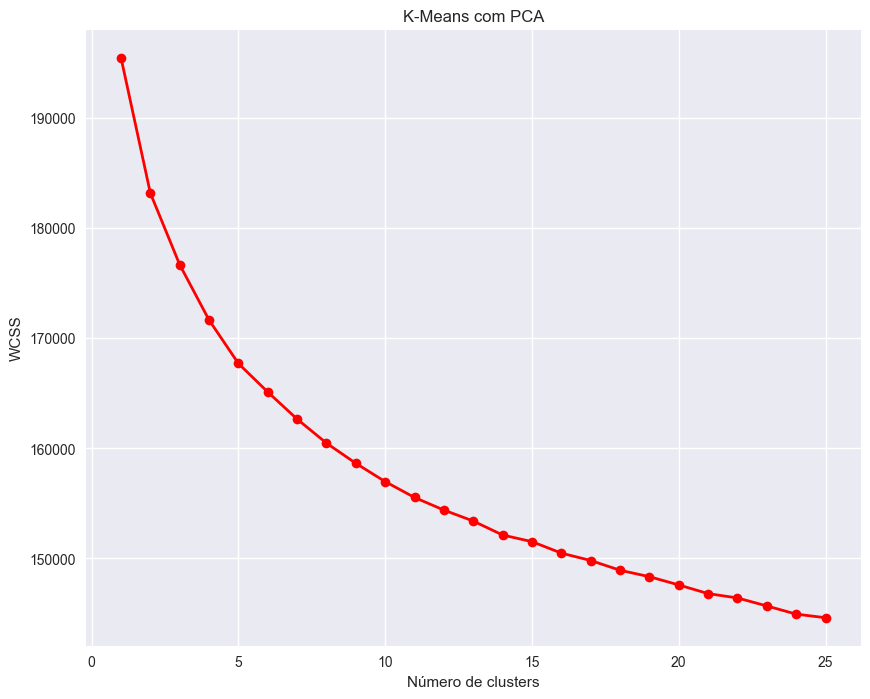

In [32]:
plt.figure(figsize = (10,8))
plt.plot(range(1,26), wcss, 'ro-', linewidth = 2)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.title('K-Means com PCA')
plt.show()

#  K-Means ponderado
Os pontos de dados podem ter pesos diferentes. Isso permite dar mais importância a certos pontos durante o cálculo dos centroides, influenciando a estrutura do agrupamento resultante.

Oo K-Means é um algoritmo popular de aprendizado não supervisionado usado para agrupar pontos de dados em clusters com base em sua proximidade. Ele opera através da atribuição iterativa dos pontos aos clusters e da atualização dos centroides. O K-Means ponderado é uma variante que permite atribuir pesos diferentes aos pontos de dados durante o cálculo dos centroides.